# Programming Assignment 3: Multi-class classifcation and Neural Networks


## 1 Multi-class Classification
Use logistic regression and neural networks to recognize handwritten digits

### 1.1 Dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load .mat files
import random
from scipy import optimize
%matplotlib inline

In [29]:
data=scipy.io.loadmat('hws\machine-learning-ex3\ex3\ex3data1.mat')
X=data['X']
y=data['y']

### 1.2 Visualizing the data

(-0.5, 398.5, 19.5, -0.5)

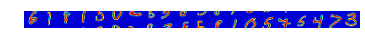

In [30]:
sample=np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off')

### 1.3 Vectorizing Logistic Regression

In [31]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(0) #should be .5

0.5

In [32]:
num_labels=10
lambda_val=0
m,n=X.shape
X=np.insert(X,0,values=np.ones(m),axis=1) #inset column of ones at beginning
theta=np.zeros((X.shape[1],1))

In [33]:
def lrCostFunction(theta,X,y,lambda_val):
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    cost=np.sum(np.dot(-y.T,np.log(hx))-np.dot((1-y.T),np.log(1-hx)))/m
    return cost

In [34]:
def lrGradFunction(theta,X,y,lambda_val): #vectorized partial derivatives
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    partials=np.dot(X.T,(hx-y))/m
    return partials

In [35]:
def lrCostFunction_reg(theta,X,y,lambda_val):
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    cost=np.sum(np.dot(-y.T,np.log(hx))-np.dot((1-y.T),np.log(1-hx)))/m
    reg_term=lambda_val/(2*m)*np.sum(theta**2)
    return cost+reg_term

In [36]:
def lrGradFunction_reg(theta,X,y,lambda_val):
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    partials=np.dot(X.T,(hx-y))/m
    reg_term=(lambda_val/m)*theta[1:len(theta)]
    partials[1:len(theta)]=partials[1:len(theta)]+reg_term
    return partials

### 1.4 One-vs-all Classification
Implement one-vs-all classification by training multiple regularized logisitc regression classifiers

In [109]:
def oneVsAll(X,y,num_labels,lambda_val):
    m,n=X.shape
    theta_matrix=np.zeros((num_labels,n))
    for i in range(1,num_labels+1):
        new_y=np.zeros((len(y))) #create new y
        new_y[np.squeeze(y==i)]=1 #set one K class to 1 and other 8 to 0
        print ("Optimizing number %d..."%i)
        theta_matrix[i-1]=optimize.minimize(lrCostFunction_reg, theta, args=(X,new_y,lambda_val), method=None,jac=lrGradFunction_reg).x
    return theta_matrix
theta_matrix=oneVsAll(X,y,num_labels,.3)

Optimizing number 1...
Optimizing number 2...
Optimizing number 3...
Optimizing number 4...
Optimizing number 5...
Optimizing number 6...
Optimizing number 7...
Optimizing number 8...
Optimizing number 9...
Optimizing number 10...


### 1.5 One-vs-all Prediction

In [110]:
probs=sigmoid(np.dot(X,theta_matrix.T)) #grab probabilities of each digit
results=np.argmax(probs,axis=1)+1 #see which column is highest. Add one because there is no digit 0. 
results[results==0]=10 #replace 0's with 10s
np.sum(np.squeeze(y)==results)/len(y)

0.95120000000000005

## Neural Networks

### 2.1 Model representation
Neural net has 3 layers, input layer, hidden layer, and output layer. Inputs are pixel values of digit images. Parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units.

In [24]:
weights=scipy.io.loadmat('hws\machine-learning-ex3\ex3\ex3weights.mat')
theta1,theta2=weights['Theta1'],weights['Theta2']
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


### 2.2 Feedforward Propagation and Prediction

In [86]:
def predict(theta1,theta2,X):
    a2=sigmoid(np.dot(theta1,X.T))
    a2=np.insert(a2,0,values=np.ones(len(X)),axis=0)
    a3=sigmoid(np.dot(theta2,a2)).T
    predictions=np.argmax(a3,axis=1)+1
    return predictions
predictions=predict(theta1,theta2,X)

In [87]:
np.sum(np.squeeze(y)==predictions)/len(y)